In [1]:
import pymc3 as pm

In [2]:
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
data=pd.Series([0.053171419,
0.00793533,
0.069957453,
0,
0.010331106,
0.020675221,
0.020429338,
0.119704577,
0.00908312,
0.048278804,
0.182252426,
0.275020133,
0.060924623,
0.12223645,
])

In [4]:
 def model_returns_t(data, samples=500): 
    with pm.Model() as model:
        mu = pm.Normal('mean returns', mu=0, sd=.01,testval=5)
        sigma = pm.HalfCauchy('volatility', beta=1, testval=2)
        returns = pm.Normal('returns', mu=mu, sd=sigma, observed=data)
        pm.Deterministic(
            'annual volatility',
            returns.distribution.variance**.5 *
            np.sqrt(252))
        pm.Deterministic(
            'sharpe',
            returns.distribution.mean /
            returns.distribution.variance**.5 *
            np.sqrt(252))
 
        start = pm.find_MAP(fmin=sp.optimize.fmin_powell)
        step = pm.NUTS(scaling=start)
        trace = pm.sample(samples, step, start=start, cores=1)
    return model,pm.traceplot(trace)

C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\pymc3\tuning\starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = 15.388:   2%|█▏                                                             | 90/5000 [00:00<00:04, 1047.11it/s]

Optimization terminated successfully.
         Current function value: -15.387880
         Iterations: 4
         Function evaluations: 97


logp = 15.388:   2%|█▎                                                               | 97/5000 [00:02<02:06, 38.72it/s]
Sequential sampling (2 chains in 1 job)
NUTS: [volatility, mean returns]
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 930.06it/s]
C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


(<pymc3.model.Model at 0x2b658657860>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B652F68F28>,
       dtype=object))

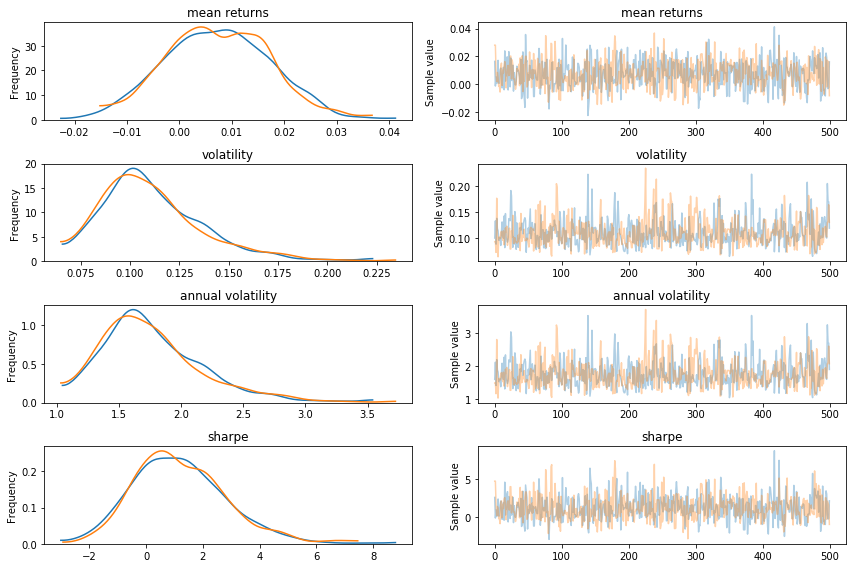

In [5]:
model_returns_t(data, samples=500)